## Import modules

In [1]:
print 'importing modules  '
import os

import subprocess

import datetime
from datetime import datetime as time

import pandas as pd
print pd.__version__


import matplotlib
import matplotlib.pyplot as plt
print matplotlib.__version__

from collections import Counter

import numpy as np
print np.__version__


import scipy
import scipy.stats as stats
print scipy.__version__

import Bio
from Bio.Seq import Seq
print Bio.__version__

%matplotlib inline
# magic command for matplotlib figures in the jupyter notebook

importing modules  
0.23.4
2.2.3
1.15.4
1.1.0
1.71


## Import Chip info

In [2]:
guide_list = []

guide_table = './chip_table_reannot.tsv'

with open(guide_table, 'r') as source:

    next(source)

    for line in source:

        line_data = line.split('\t')

        guide_name = line_data[0]
        
        guide_list.append(guide_name)
        
print len(guide_list)
print guide_list[0]

chip_table = pd.read_csv('./chip_table_reannot.tsv', sep='\t', index_col=0)
print chip_table.head(10)
print chip_table.index[0:10]
print chip_table['orf_type'].describe()



39978
chrI_55522r
             number     orf_type   target  position strand  \
guide_name                                                   
chrI_55522r       0  high_effect  YAL047C      1313      +   
chrI_55603r       1  high_effect  YAL047C      1232      +   
chrI_55655        2  high_effect  YAL047C      1183      -   
chrI_55964        3  high_effect  YAL047C       874      -   
chrI_55988        4  high_effect  YAL047C       850      -   
chrI_56003        5  high_effect  YAL047C       835      -   
chrI_56041        6  high_effect  YAL047C       797      -   
chrI_56071        7  high_effect  YAL047C       767      -   
chrI_56113r       8  high_effect  YAL047C       722      +   
chrI_56144        9  high_effect  YAL047C       694      -   

                         sequence  \
guide_name                          
chrI_55522r  TCAGTTAGACAAATTAGACT   
chrI_55603r  GGACAGCTACATCAATGACT   
chrI_55655   GGTCTGAGTTTCCAGTTCTT   
chrI_55964   AATCTCTAATTGAGTGTCTA   
chrI_55988   TT

## import counts

In [ ]:
raw_counts = pd.DataFrame.from_csv('./full_guide_counts_v1_corr.csv')
raw_counts.head(10)

lib_read_sum_dict = {}


for lib in raw_counts.columns:
    lib_read_sum_dict[lib] = raw_counts[lib].sum()
    print lib
    
plt.plot(lib_read_sum_dict.values())

In [4]:
print len(raw_counts.index)
print len([x for x in raw_counts.index if '|' in x])

41010
1032


## remove low count guides

In [ ]:
print list(raw_counts.loc['chrIII_109389']).count(0)

zero_count_dist = []

dropped_guides_count_sum = []

dropped_index_list = []

print len(raw_counts.index)

for guide_name in raw_counts.index:
   
    zero_count = list(raw_counts.loc[guide_name]).count(0)
    
    zero_count_dist.append(zero_count)
    
    if zero_count > 12:
        # guide that should be dropped: chrI_56191r
        
        read_sum_for_guide = raw_counts.loc[guide_name].sum()
        dropped_guides_count_sum.append(read_sum_for_guide)
        
        dropped_index_list.append(guide_name)
           
        raw_counts.drop([guide_name], inplace=True)
        
        
        
plt.hist(zero_count_dist, bins = 20)
# Lets try dropping all guides with over 16 counts = 0
print len(raw_counts.index)
#print raw_counts.loc['chrI_56191r']
# should give an error
plt.show()
print raw_counts.loc['chrIII_241747']
plt.hist(dropped_guides_count_sum)


In [7]:
print len(dropped_index_list)
print len([x for x in dropped_index_list if '|' in x])

4446
0


SpearmanrResult(correlation=0.829647059009279, pvalue=0.0)
7122
15190
50.5


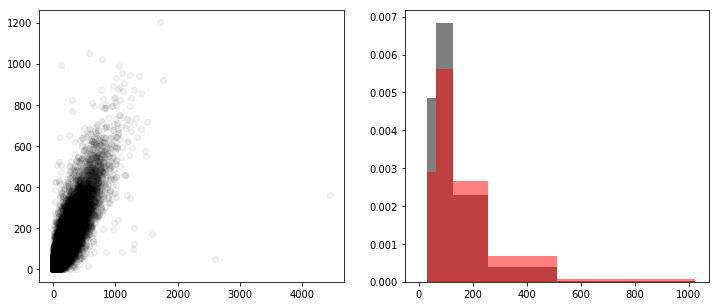

In [8]:
plt.figure(figsize = (12,5))
plt.subplot(121)

plt.scatter(raw_counts['DSUR1_16_A'], raw_counts['DSUR1_16_B'], color = 'k', alpha = 0.05)

print stats.spearmanr(raw_counts['DSUR1_16_A'], raw_counts['DSUR1_16_B'])


plt.subplot(122)

mismatch_mean_count = []

match_mean_count = []

mean_list = []

for guide in raw_counts.index:
    
    repA_value = raw_counts.loc[guide]['DSUR1_16_A']
    
    repB_value = raw_counts.loc[guide]['DSUR1_16_B']
    
    mean = (repA_value+repB_value)/2.0
    
    
    
    if mean > 50:
        
        mean_list.append(mean)
    
        if repA_value*2 < repB_value or repA_value/2 > repB_value:

            mismatch_mean_count.append(mean)

        else:

            match_mean_count.append(mean)
        
bins = [0,2,4,8,16,32,64,128,256,512,1024]        

plt.hist(mismatch_mean_count, density = True, bins = bins, color = 'black', alpha = 0.5)
plt.hist(match_mean_count, density = True, bins = bins, color = 'red', alpha = 0.5)

        
print len(mismatch_mean_count)
print len(match_mean_count)
print min(mean_list)

In [16]:
def time_point_corr(time_one, time_two, min_count):
    
    time_one_over_min = raw_counts[time_one] >= min_count
    
    filtered_df = raw_counts[time_one_over_min]
    
    n_gRNA = len(filtered_df)
    
    corr = stats.pearsonr(filtered_df[time_one], filtered_df[time_two])
    
    #print corr[0]
    
    return n_gRNA, corr[0]
    
    

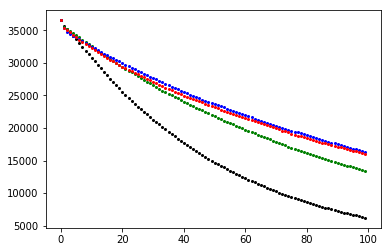

In [17]:
for x in np.arange(0,100,1):
    
    glu = time_point_corr('glu_16_A', 'glu_16_B',x)[0]
    gly = time_point_corr('gly_16_A', 'gly_16_B',x)[0]
    gal = time_point_corr('gal_16_A', 'gal_16_B',x)[0]
    mock = time_point_corr('mock_16_A', 'mock_16_B',x)[0]
    
    plt.plot(x, glu,'ko', ms=2)
    plt.plot(x, gly,'go', ms=2)
    plt.plot(x, gal,'bo', ms=2)
    plt.plot(x, mock,'ro', ms=2)

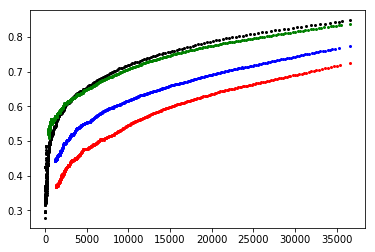

In [18]:
for x in np.arange(0,500,1):
    
    glu = time_point_corr('glu_16_A', 'glu_16_B',x)[0]
    gly = time_point_corr('gly_16_A', 'gly_16_B',x)[0]
    gal = time_point_corr('gal_16_A', 'gal_16_B',x)[0]
    mock = time_point_corr('mock_16_A', 'mock_16_B',x)[0]
    
    glur = time_point_corr('glu_16_A', 'glu_16_B',x)[1]
    glyr = time_point_corr('gly_16_A', 'gly_16_B',x)[1]
    galr = time_point_corr('gal_16_A', 'gal_16_B',x)[1]
    mockr = time_point_corr('mock_16_A', 'mock_16_B',x)[1]
    
    plt.plot(glu, glur,'ko', ms=2)
    plt.plot(gly, glyr,'go', ms=2)
    plt.plot(gal, galr,'bo', ms=2)
    plt.plot(mock, mockr,'ro', ms=2)

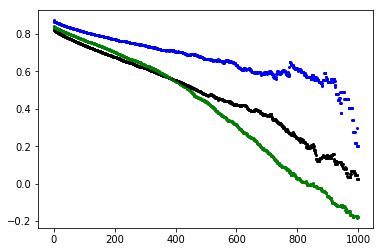

In [19]:
for x in np.arange(0,1000,1):
    
    glu = time_point_corr('DS_16_A', 'DS_16_B',x)[1]
    gly = time_point_corr('DSUR1_16_A', 'DSUR1_16_B',x)[1]
    gal = time_point_corr('DSUR2_16_A', 'DSUR2_16_B',x)[1]
    
    plt.plot(x, glu,'ko', ms=2)
    plt.plot(x, gly,'go', ms=2)
    plt.plot(x, gal,'bo', ms=2)


In [20]:
def timepoint_diffs(time_one, time_two, min_count):
    # must be two of the libraries in raw_counts.columns
    
    p_val_dist = {}
    log2_fold_change = {}
    
    guides_in_dicts = []

    for guide in raw_counts.index:

        count_one = raw_counts.loc[guide][time_one]
        count_two = raw_counts.loc[guide][time_two]

        if count_one >= min_count:

            obs = np.array([[count_one, count_two], 
                            [(lib_read_sum_dict[time_one]-count_one), (lib_read_sum_dict[time_two]-count_two)]])

            proportion_one = np.log2(count_one*1.0/lib_read_sum_dict[time_one])
            proportion_two = np.log2((count_two+1)*1.0/lib_read_sum_dict[time_two])

            log2_fold_change[guide] = (proportion_two-proportion_one)

            test = stats.chi2_contingency(obs)
            # generate the chi2 contingency table 

            chi2_p = (test[1])
            # extract p-value, apply correction

            p_val_dist[guide] = chi2_p
            
    #print len(p_val_dist.keys()), '    guides with n_1 > above treshold    ',  min_count 
            
    return p_val_dist, log2_fold_change, p_val_dist.keys()
    
    
print raw_counts.columns    

Index([u'DSUR1_16_A', u'DSUR1_16_B', u'DSUR2_16_A', u'DSUR2_16_B', u'DS_16_A',
       u'DS_16_B', u'NoDSUR1_16_A', u'NoDSUR1_16_B', u'NoDSUR2_16_A',
       u'NoDSUR2_16_B', u'gal_16_A', u'gal_16_B', u'glu_16_A', u'glu_16_B',
       u'gly_16_A', u'gly_16_B', u'mock_16_A', u'mock_16_B', u'noDS_16_A',
       u'noDS_16_B'],
      dtype='object')


In [21]:
galtoUR2_A = timepoint_diffs('gal_16_A', 'DSUR2_16_A',20)
#galtoUR2_AnoDS = timepoint_diffs('gal_16_A', 'NoDSUR2_16_A', 20)


guides_above_threshold = []
guides_above_threshold_mismatches =[]

for x in np.arange(1, 80, 2):
   
    guides_above_threshold.append(len([x for x in timepoint_diffs('gal_16_A', 'DSUR2_16_A', x)[2] if '|' not in x]))
    



    
    

In [22]:
for x in np.arange(1, 80, 2):
    guides_above_threshold_mismatches.append(len([x for x in timepoint_diffs('gal_16_A', 'DSUR2_16_A', x)[2] if '|' in x]))

In [23]:
print (guides_above_threshold)
print (guides_above_threshold_mismatches)

[34285, 33436, 32892, 32325, 31727, 31243, 30707, 30196, 29712, 29233, 28730, 28261, 27817, 27343, 26935, 26530, 26097, 25686, 25274, 24862, 24462, 24087, 23732, 23388, 23045, 22737, 22448, 22109, 21772, 21443, 21136, 20797, 20504, 20198, 19906, 19633, 19363, 19094, 18804, 18534]
[1032, 1031, 1031, 1027, 1022, 1018, 1016, 1012, 999, 994, 985, 976, 968, 956, 941, 929, 918, 898, 884, 866, 852, 832, 811, 789, 765, 749, 724, 697, 678, 663, 652, 641, 624, 602, 577, 562, 546, 526, 511, 494]


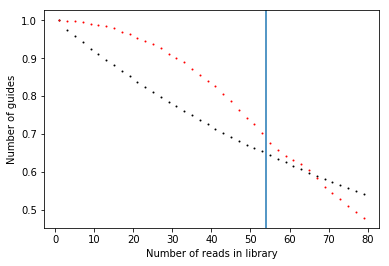

In [24]:
plt.plot([x for x in np.arange(1,80,2)], [x*1.0/max(guides_above_threshold) for x in guides_above_threshold], 'ko', ms= 1.0 )
plt.plot([x for x in np.arange(1,80,2)], [x*1.0/max(guides_above_threshold_mismatches) for x in guides_above_threshold_mismatches if x>0], 'ro', ms= 1.0 )


plt.xlabel('Number of reads in library')
plt.ylabel('Number of guides')
plt.axvline(54)


54 17121 SpearmanrResult(correlation=0.2797547038617076, pvalue=2.4725716200232586e-305)
       slope               intercept                    r_value              p_value                  std_err


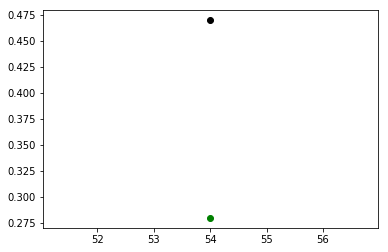

In [26]:
usable_guides = []

iter_dict = {}

for y in np.arange(54,55,1):
    
    galtoUR2_A = timepoint_diffs('gal_16_A', 'DSUR2_16_A',y)
    galtoUR2_B = timepoint_diffs('gal_16_B', 'DSUR2_16_B',y)
    
    in_both_galtoUR2 = set(galtoUR2_A[2]) & set(galtoUR2_B[2])
       
    
    iter_dict[y] = [galtoUR2_A, galtoUR2_B]
    
    
    usable_guides.append(len(in_both_galtoUR2))
    
    

for y in np.arange(54,55,1):
    
    rep_a = iter_dict[y][0]
    rep_b = iter_dict[y][1]

    in_both_galtoUR2 = set(rep_a[2]) & set(rep_b[2])

    log2_a = [rep_a[1][x] for x in in_both_galtoUR2]
    log2_b = [rep_b[1][x] for x in in_both_galtoUR2]
    
    if len(log2_a) == len(log2_b):
        print y, len(log2_a), stats.spearmanr(log2_a, log2_b, axis = 0)
        plt.plot(y, stats.linregress(log2_a, log2_b)[0], 'ko')
        plt.plot(y, stats.spearmanr(log2_a, log2_b, axis = 0)[0], 'go')

print '       slope               intercept                    r_value              p_value                  std_err'

40 20122 (0.25769141902603715, 1.36150853200736e-302)
41 19871 (0.25990447778844633, 3.812666640557201e-304)
42 19633 (0.2608803861045693, 7.459029215055037e-303)
43 19415 (0.26280375928854427, 4.4669940745898064e-304)
44 19212 (0.2648127249417843, 1.1257659152124065e-305)
45 18985 (0.2639170567196713, 5.471666828979625e-300)
46 18766 (0.26471958723291533, 2.061577474095554e-298)
47 18556 (0.2668339526846974, 5.6744941268144696e-300)
48 18345 (0.269447397233822, 1.3224932322489314e-302)
49 18144 (0.2706116726357424, 5.492576079701138e-302)
50 17922 (0.27294661176779617, 1.1810172466097426e-303)
51 17733 (0.2742298112971902, 2.1272925690034046e-303)
52 17527 (0.27584710779222005, 1.4534455086385915e-303)
53 17326 (0.2776353040748948, 3.840155230976667e-304)
54 17121 (0.2797547038617076, 2.4725716200232586e-305)
55 16921 (0.2787223170992148, 1.7138344060151792e-299)
56 16722 (0.28075809167710114, 1.7441261895175574e-300)
57 16531 (0.28112257937605456, 7.092175127427677e-298)
58 16326 (0.2817356217184081, 1.5454094871407326e-295)
59 16140 (0.2824162801573744, 1.1717035798359536e-293)
60 15956 (0.2813487455875792, 4.559933047602748e-288)
61 15794 (0.2819037478443856, 2.494334174010408e-286)
62 15613 (0.2820540892654816, 2.1955040122008754e-283)
63 15437 (0.2828245893968306, 8.42839333682171e-282)
64 15262 (0.28320352195131904, 2.1045381370861185e-279)
65 15103 (0.2861791676914259, 1.450842630419907e-282)
66 14906 (0.28722163841569515, 5.1328049599274304e-281)
67 14724 (0.2860432339916553, 2.9538347514822315e-275)
68 14565 (0.28534079236838833, 6.3549662486256e-271)
69 14387 (0.28721363932998717, 2.735022314002288e-271)
70 14219 (0.2869284204619993, 1.3540853773643731e-267)
71 14056 (0.2882296052161306, 4.823025430909226e-267)
72 13884 (0.28906283841967273, 2.199329245469966e-265)
73 13706 (0.28955643217824745, 6.158135082430848e-263)
74 13562 (0.28900704091416185, 3.5656633658350243e-259)
75 13409 (0.2916186679976625, 4.2415917412875e-261)
76 13254 (0.29322891871059953, 4.52507865896332e-261)
77 13096 (0.29262822735566746, 6.890903374339783e-257)
78 12946 (0.2930878423107294, 8.478939097667623e-255)
79 12800 (0.29222629762319347, 2.052236975726074e-250)
80 12633 (0.29379777686679376, 6.118724487074253e-250)

Text(0,0.5,'Log2 fold-change replicate B')

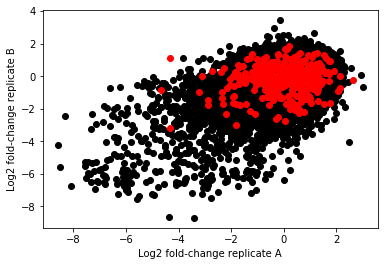

In [27]:
treshold_20_a = iter_dict[54][0]
treshold_20_b = iter_dict[54][1]

in_both_galtoUR2 = set(treshold_20_a[2]) & set(treshold_20_b[2])

plt.figure()

for x in in_both_galtoUR2:

    log2_a = treshold_20_a[1][x]
    log2_b = treshold_20_b[1][x]
    
    if '|' in x:
        plt.plot(log2_a, log2_b, 'ro', zorder = 9.0)
        
    else:
        plt.plot(log2_a, log2_b, 'ko')
        
plt.xlabel('Log2 fold-change replicate A')
plt.ylabel('Log2 fold-change replicate B')

In [28]:
treshold_20_a = iter_dict[54][0]
treshold_20_b = iter_dict[54][1]

in_both_galtoUR2 = set(treshold_20_a[2]) & set(treshold_20_b[2])

print len([x for x in in_both_galtoUR2 if '|' in x])

print [x for x in in_both_galtoUR2 if '|' in x and treshold_20_a[1][x] <= -2.0 and treshold_20_b[1][x] <= -2.0]
print [x for x in in_both_galtoUR2 if '|' not in x and treshold_20_a[1][x] <= -6.0 and treshold_20_b[1][x] <= -6.0]


print len([x for x in in_both_galtoUR2 if treshold_20_a[1][x] <= -1.918 and treshold_20_b[1][x] <= -1.786])
print len([x for x in in_both_galtoUR2 if treshold_20_a[1][x] >= 1.415 and treshold_20_b[1][x] >= 1.130])

a_vals_neg = [treshold_20_a[1][x] for x in in_both_galtoUR2 if '|' in x]
b_vals_neg = [treshold_20_b[1][x] for x in in_both_galtoUR2 if '|' in x]


print np.percentile(a_vals_neg, 5)
print np.percentile(b_vals_neg, 5)
print np.percentile(a_vals_neg, 95)
print np.percentile(b_vals_neg, 95)

367
['chrXII_111508r|19:T>C', 'chrVI_228169|14:T>C']
['chrXVI_535102r', 'chrX_262046', 'chrXVI_95008', 'chrIV_425067r', 'chrVII_410540', 'chrXII_208831r', 'chrIX_81479', 'chrXII_283290r', 'chrIV_196028', 'chrXVI_899429', 'chrVI_56640r', 'chrXVI_111138r', 'chrXV_816656', 'chrIX_70781', 'chrI_79822', 'chrXV_964015r', 'chrXIII_859734', 'chrXI_103053r', 'chrXI_512718', 'chrXII_565832']
459
33
-1.9181725442666728
-1.7716970122507743
1.4154757116005294
1.130703340314386


Text(0,0.5,'Log2 fold-change replicate B')

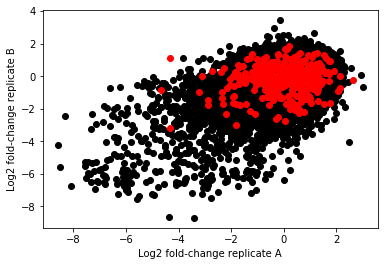

In [29]:
treshold_54_a = iter_dict[54][0]
treshold_54_b = iter_dict[54][1]

in_both_galtoUR2 = set(treshold_54_a[2]) & set(treshold_54_b[2])

plt.figure()

for x in in_both_galtoUR2:

    log2_a = treshold_54_a[1][x]
    log2_b = treshold_54_b[1][x]
    
    if '|' in x:
        plt.plot(log2_a, log2_b, 'ro', zorder = 9.0)
        
    else:
        plt.plot(log2_a, log2_b, 'ko')
        
plt.xlabel('Log2 fold-change replicate A')
plt.ylabel('Log2 fold-change replicate B')

## with error synthesis guides

17121
367
16754
0.01075738396650026 1.0751692781499973
-0.1829165315680474 0.8823801828211948


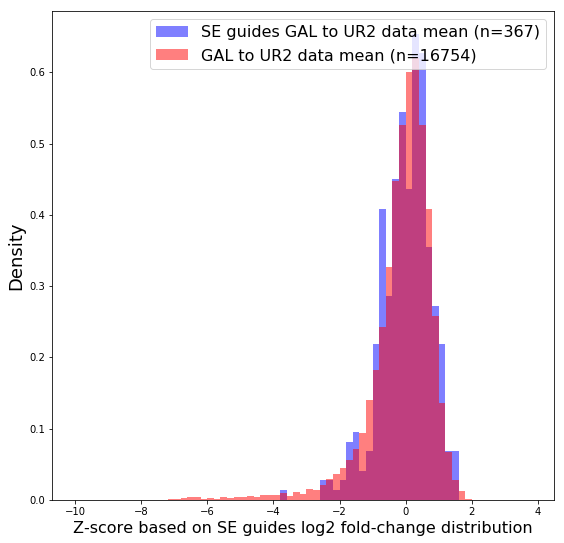

In [30]:
def z_score(log2change, mean, std):
    
    diff_mean = float(log2change-mean)
    z_score = diff_mean/std
    
    return z_score



galtoUR2_A = timepoint_diffs('gal_16_A', 'DSUR2_16_A',54)
galtoUR2_B = timepoint_diffs('gal_16_B', 'DSUR2_16_B',54)

in_both_gal_to_UR2 = set(galtoUR2_A[2]) & set(galtoUR2_B[2])
print len(in_both_gal_to_UR2)


with_error = [x for x in in_both_gal_to_UR2 if '|' in x]

print len(with_error)

without_error = [x for x in in_both_gal_to_UR2 if '|' not in x]
print len(without_error)

gal_to_UR2_log2change_A_error = [galtoUR2_A[1][x] for x in with_error]
gal_to_UR2_log2change_B_error = [galtoUR2_B[1][x] for x in with_error]

mean_A = np.mean(gal_to_UR2_log2change_A_error)
std_A = np.std(gal_to_UR2_log2change_A_error)

mean_B = np.mean(gal_to_UR2_log2change_B_error)
std_B = np.std(gal_to_UR2_log2change_B_error)

print mean_A, std_A
print mean_B, std_B

guide_mean_gal_UR2_error_zscore = {}

for x in with_error:
    
    z_score_A = z_score(galtoUR2_A[1][x], mean_A, std_A)
    
    z_score_B = z_score(galtoUR2_B[1][x], mean_B, std_B)
    
    mean_z_score = np.mean([z_score_A, z_score_B])
    
    guide_mean_gal_UR2_error_zscore[x] = mean_z_score
    
    
    
guide_mean_gal_UR2_no_error_zscore = {}
    
for x in without_error:
    
    z_score_A = z_score(galtoUR2_A[1][x], mean_A, std_A)
    
    z_score_B = z_score(galtoUR2_B[1][x], mean_B, std_B)
    
    mean_z_score = np.mean([z_score_A, z_score_B])
    
    guide_mean_gal_UR2_no_error_zscore[x] = mean_z_score


plt.figure(figsize=(9,9))
    
bins = np.arange(-10, 4, 0.2)
    
plt.hist([x for x in guide_mean_gal_UR2_error_zscore.values()],bins=bins, density = True , color = 'blue', alpha = 0.5)
plt.hist([x for x in guide_mean_gal_UR2_no_error_zscore.values()],bins=bins, density = True, color = 'red', alpha = 0.5)

plt.xlabel('Z-score based on SE guides log2 fold-change distribution', fontsize = 16)
plt.ylabel('Density', fontsize = 18)

plt.legend(['SE guides GAL to UR2 data mean (n=367)', 'GAL to UR2 data mean (n=16754)'], fontsize = 16)


In [31]:
norm = stats.norm.fit(guide_mean_gal_UR2_error_zscore.values())
print norm

(2.420104685831404e-18, 0.7637386799982347)


Text(0.5,0,'z-score')

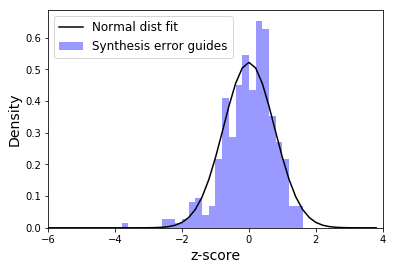

In [32]:
plt.hist([x for x in guide_mean_gal_UR2_error_zscore.values()],bins=bins, density = True , color = 'blue', alpha = 0.4)
plt.plot([x for x in bins],[stats.norm.pdf(x, 2.420104685831404e-18, 0.7637386799982347) for x in bins], 'k-')

plt.legend(['Normal dist fit','Synthesis error guides'], loc='upper left', fontsize = 12)
plt.ylabel('Density', fontsize =14)
plt.xlim(-6,4)
plt.xlabel('z-score', fontsize =14)

-7.486674404770064


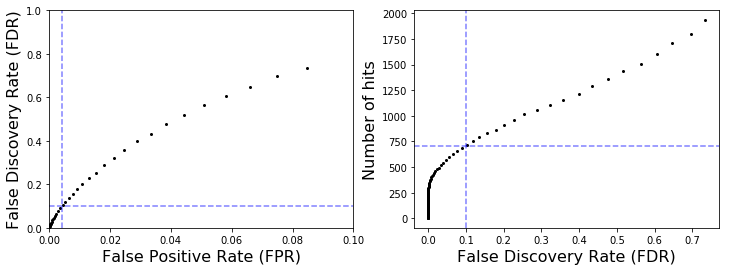

In [34]:
exp_vals = [x for x in guide_mean_gal_UR2_no_error_zscore.values()]
print min(exp_vals)

n_exp_vals = len(exp_vals)

bins = np.arange(-7, -1, 0.05)

plt.figure(figsize=(12,4))
ax1 = plt.subplot(121)
ax2 = plt.subplot(122)

for z in bins:
    
    FPR_norm = stats.norm.cdf(z, 2.420104685831404e-18, 0.7637386799982347)
    
    pos = len([x for x in exp_vals if x < z])
    PR = pos*1.0/n_exp_vals
    
    FDR_norm = (FPR_norm)*1.0/PR
    
    #print z, FPR_gumbel, FPR_norm, pos, PR
    
    ax1.plot(FPR_norm, FDR_norm, 'ko', ms= 2)
    
    ax2.plot(FDR_norm, pos,'ko', ms= 2)
    
ax1.set_xlim(0,0.10)
ax1.set_ylim(0,1)
ax1.set_xlabel('False Positive Rate (FPR)', fontsize=16)
ax1.set_ylabel('False Discovery Rate (FDR)', fontsize=16)
ax1.axhline(0.1, color = 'b', linestyle='--', alpha = 0.5)
ax1.axvline(0.0042, color = 'b', linestyle='--', alpha = 0.5)




ax2.set_xlabel('False Discovery Rate (FDR)', fontsize=16)
ax2.set_ylabel('Number of hits', fontsize=16)
ax2.axhline(708, color = 'b', linestyle='--', alpha = 0.5)
ax2.axvline(0.1, color = 'b', linestyle='--', alpha = 0.5)

plt.savefig('./FDR_FPR_hit_plot.svg', format = 'svg',
           dpi=300)
# Supplementary Figure 7, Panels B and C

In [35]:
z=-2.01
FPR_norm = stats.norm.cdf(z, 2.420104685831404e-18, 0.7637386799982347)
    
pos = len([x for x in exp_vals if x < z])
PR = pos*1.0/n_exp_vals
    
FDR_norm = (FPR_norm)*1.0/PR

print z, FPR_norm, FDR_norm, pos, PR

-2.01 0.004246814296325814 0.10049594169582302 708 0.0422585651188


In [36]:
z=-2.23045
FPR_norm = stats.norm.cdf(z, 2.420104685831404e-18, 0.7637386799982347)
    
pos = len([x for x in exp_vals if x < z])
PR = pos*1.0/n_exp_vals
    
FDR_norm = (FPR_norm)*1.0/PR

print z, FPR_norm, FDR_norm, pos, PR

-2.23045 0.0017477094453926065 0.05031120970465246 582 0.0347379730214


In [37]:
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

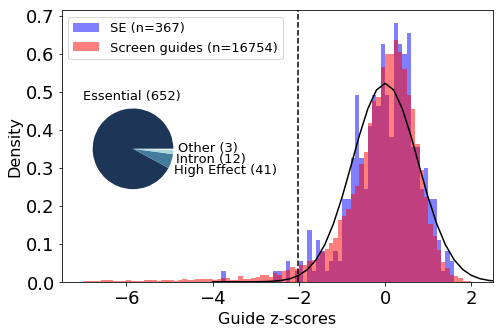

In [38]:
np.random.seed(seed=1)

plt.figure(figsize = (17,5))    
bins = np.arange(-7, 4, 0.1)


ax1 = plt.subplot(121)
plt.hist([x for x in guide_mean_gal_UR2_error_zscore.values()], density = True, bins = bins, color = 'blue', 
         alpha = 0.5, linewidth = 3)
plt.hist([x for x in guide_mean_gal_UR2_no_error_zscore.values()], density = True, bins = bins, color = 'red',
        alpha = 0.5, linewidth = 3)

plt.legend(['SE (n=367)', 'Screen guides (n=16754)'],fontsize = 13,
          loc = 'upper left')

bins = np.arange(-4, 4, 0.2)
plt.plot([x for x in bins],[stats.norm.pdf(x, 2.420104685831404e-18, 0.7637386799982347) for x in bins], 'k-')





plt.xlabel('Guide z-scores', fontsize = 16)
plt.ylabel('Density', fontsize = 16)

plt.xticks(fontsize = 18)
plt.yticks(fontsize = 18)

plt.axvline(-2.01,linestyle='--', color='k')
plt.xlim(-7.5,2.5)



axins = inset_axes(ax1, width=2.8, height=2.8, bbox_to_anchor=(-0.08,0.1, 0, 0),
                   bbox_transform=ax1.transAxes, loc=3)


#0072B2 essential
#F0E442 high_effect
#009E73 intron
#D55E00 no_effect
#E69F00 putative_NF
#000000 exception

colors = ['#1d3557', '#457b9d', '#a8dadc', '#f1faee']
labels = ['Essential', 'High effect', 'Intron', 'Other']
fracs = [652,41,12,3]


axins.pie(fracs, colors = colors, radius = 0.5)

plt.text(0.05,0.67,'Essential (652)', fontsize =13, transform=ax1.transAxes)
plt.text(0.26,0.40,'High Effect (41)', fontsize =13, transform=ax1.transAxes)
plt.text(0.265,0.44,'Intron (12)', fontsize =13, transform=ax1.transAxes)
plt.text(0.27,0.48,'Other (3)', fontsize =13, transform=ax1.transAxes)

plt.savefig('./F3A_revisedv2.svg', format='svg', dpi = 600)

In [39]:
threshold=-2.01

table_out = './z_score_table.tsv'

with open(table_out, 'w') as out:
    
    out.write('guide\ttarget\tmutation_CtoG\tmutation_CtoT\tz_score_meanSE\tover_threshold\n')

    for x in in_both_gal_to_UR2:
        
        guide = x
        
        over_t = 'No'
        
        if x in guide_mean_gal_UR2_no_error_zscore.keys():
            # filters out guides with synthesis errors
            
            if guide_mean_gal_UR2_no_error_zscore[x] <= threshold:
                
                over_t = 'Yes'          
        
            target = chip_table.loc[x]['target']

            mutation_CtoG = chip_table.loc[x]['mut1_C>G']

            mutation_CtoT = chip_table.loc[x]['mut1_C>T']

            z_score_meanSE = guide_mean_gal_UR2_no_error_zscore[x]       

            to_write = x + '\t' + target + '\t' + mutation_CtoG + '\t' + mutation_CtoT + '\t' + str(z_score_meanSE) + '\t' + over_t +'\n'

            out.write(to_write)